# CheckPoint 4
## Redes Neuronales

# Imports

In [1]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_train.csv

--2023-11-02 20:43:51--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9788953 (9.3M) [text/plain]
Saving to: ‘hotels_train.csv’

hotels_train.csv    100%[===================>]   9.33M  --.-KB/s    in 0.05s   

2023-11-02 20:43:51 (199 MB/s) - ‘hotels_train.csv’ saved [9788953/9788953]



In [2]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_test.csv

--2023-11-02 20:43:52--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4432981 (4.2M) [text/plain]
Saving to: ‘hotels_test.csv’

hotels_test.csv     100%[===================>]   4.23M  --.-KB/s    in 0.02s   

2023-11-02 20:43:52 (170 MB/s) - ‘hotels_test.csv’ saved [4432981/4432981]



In [3]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

In [4]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2,l1#importar l1 tambien

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [5]:
tf.keras.utils.set_random_seed(90)

In [6]:
df = pd.read_csv("hotels_train.csv")
df_filtrado = df.copy()

In [7]:
df.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0


# Modificando el Dataset

In [8]:
df_filtrado = df_filtrado.drop('id', axis=1)
#df_filtrado = df_filtrado.drop('company', axis=1)

Al parecer arboles de desición no aceptan dateTime

In [9]:
df_filtrado.children = df_filtrado.children.replace(np.nan, 0)
df_filtrado.agent = df_filtrado.agent.replace(np.nan, -1)
df_filtrado.company = df_filtrado.company.replace(np.nan, -1)
df_filtrado['country'] = df_filtrado['country'].replace(np.nan, 'PRT')

In [10]:
df_filtrado = df_filtrado.replace({'adults': 0}, value=2)
df_filtrado = df_filtrado.replace({'children': 10}, value=0)
df_filtrado = df_filtrado.replace({'babies': 9}, value=0)
df_filtrado = df_filtrado.replace({'adr': -6.38}, value=df_filtrado['adr'].median())
df_filtrado = df_filtrado.replace({'adr': 0}, value=df_filtrado['adr'].median())

In [11]:
df_filtrado.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,No Deposit,9.0,-1.0,0,Transient,115.5,0,1,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,No Deposit,-1.0,-1.0,0,Transient,42.0,1,0,0


# Encodeando, Separando las Columnas y Escalando Los Datos

In [12]:
ds_encodeado = pd.get_dummies(df_filtrado, columns=["hotel", "arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type", "customer_type"], drop_first=True)
ds_encodeado.head(3)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,49,2016,37,5,1,2,1,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4,2015,44,31,0,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25,2016,42,13,0,1,2,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
ds_trabajo_x=ds_encodeado.drop(['is_canceled'], axis='columns', inplace=False)

ds_trabajo_y = ds_encodeado['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,
                                                    random_state=63)

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.sort_index(axis=1))
x_test_scaled = scaler.transform(x_test.sort_index(axis=1))

# Entrenamiento y Predicción

## Gridsearch

Primero utilizamos Gridsearch para encontrar los hiperparametros optimos, luego de encontrarlos comentamos el codigo y pusimos a mano los parametros para seguir experimentando con ellos ya que GridSearch en si tardaba bastante.

In [15]:
## EL MODELO CREADO PARA GRIDSEARCH ##

# cantidad_clases = len(np.unique(y_train))#output no lo usamos al final

# entrada = len(x_train.columns)
# print(f'las clases son {np.unique(y_train)}')
# print(f'la cantidad de clases es: {cantidad_clases}, y la cantidad de entrada es: {entrada}')

# cantidad_de_neuronas = 60 #20
# lr = 0.0001 #learning rate
# dropout = 0.3

# def create_model(activation, optimizer='nadam'):
#     modelo= keras.Sequential([
#     keras.layers.Dense(input_shape = (entrada,),#parametro que solo va en la entrada
#                           units = cantidad_de_neuronas,
#                           activation = None,
#                           use_bias = True,#valor por defecto
#                           kernel_initializer= None,
#                           bias_initializer = 'zeros',
#                           kernel_regularizer = None,
#                           bias_regularizer = None,
#                           activity_regularizer = None,
#                           kernel_constraint = None,
#                           bias_constraint = None
#                           ),
#     keras.layers.Dense(units = cantidad_de_neuronas,
#                              activation = activation,
#                              use_bias = True,
#                              kernel_initializer= 'glorot_normal',
#                              bias_initializer = 'zeros',
#                              kernel_regularizer = l2(lr),
#                              bias_regularizer = l2(lr),
#                              activity_regularizer = None,
#                              kernel_constraint = None,
#                              bias_constraint = None
#                              ),
#     keras.layers.Dropout(dropout),

#     keras.layers.Dense(units = cantidad_de_neuronas,
#                              activation = activation,
#                              use_bias = True,
#                              kernel_initializer= 'glorot_normal',
#                              bias_initializer = 'zeros',
#                              kernel_regularizer = l2(lr),
#                              bias_regularizer = l2(lr),
#                              activity_regularizer = None,
#                              kernel_constraint = None,
#                              bias_constraint = None
#                              ),
#     keras.layers.Dropout(dropout),

#     keras.layers.Dense(units = cantidad_de_neuronas,
#                              activation = activation,
#                              use_bias = True,
#                              kernel_initializer= 'glorot_normal',
#                              bias_initializer = 'zeros',
#                              kernel_regularizer = l2(lr),
#                              bias_regularizer = l2(lr),
#                              activity_regularizer = None,
#                              kernel_constraint = None,
#                              bias_constraint = None
#                              ),
#     keras.layers.Dropout(dropout),

#     keras.layers.Dense(units = 1,
#                              activation = 'sigmoid',
#                              use_bias = True,
#                              kernel_initializer= 'glorot_normal',
#                              bias_initializer = 'zeros',
#                              kernel_regularizer = l2(lr),
#                              bias_regularizer = l2(lr),
#                              activity_regularizer = None,
#                              kernel_constraint = None,
#                              bias_constraint = None
#                              )])

#     modelo.compile(optimizer = keras.optimizers.Nadam(learning_rate=0.001),
#               loss = 'binary_crossentropy',
#               metrics = [keras.metrics.F1Score()])

#     return modelo

In [16]:
# modelo_cv = KerasClassifier(build_fn=create_model)

In [17]:
# epochs = [40, 50, 60]
# batches = [40, 50]
# activations = ['relu', 'sigmoid', 'tanh']
# optimizations = ['rmsprop', 'nadam']

# param_grid = dict( epochs=epochs, batch_size=batches, model__activation = activations, optimizer=optimizations)

# print(param_grid)

# grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid)
# grid_result = grid.fit(x_train_scaled, y_train)

In [18]:
# print("Mejor resultado: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

In [19]:
# model = grid_result.best_estimator_

In [20]:
# x_train_casteado = x_train_scaled.astype(np.float32)
# y_train_casteado = y_train.astype(np.float32)

# x_train_casteado = np.array(x_train_scaled, dtype=np.float32)
# y_train_casteado = np.array(y_train, dtype=np.float32)

## Sin Gridsearch
Una vez que encontramos los hiperparametros optimos con GridSearch seguimos experimentando a mano.

In [21]:
cantidad_clases = len(np.unique(y_train))

entrada = len(x_train.columns)
print(f'las clases son {np.unique(y_train)}')
print(f'la cantidad de clases es: {cantidad_clases}, y la cantidad de entrada es: {entrada}')

cantidad_de_neuronas = 60
lr = 0.0001 #learning rate
dropout = 0.3

#creo el modelo
model = keras.Sequential()

#capa de entrada
model.add(keras.layers.Dense(input_shape = (entrada,),
                             units = cantidad_de_neuronas,
                             activation = None,
                             use_bias = True,
                             kernel_initializer= None,
                             bias_initializer = 'zeros',
                             kernel_regularizer = None,
                             bias_regularizer = None,
                             activity_regularizer = None,
                             kernel_constraint = None,
                             bias_constraint = None
                             ))

#capas ocultas
model.add(keras.layers.Dense(units = cantidad_de_neuronas,
                             activation = 'relu',
                             use_bias = True,
                             kernel_initializer= 'glorot_normal',
                             bias_initializer = 'zeros',
                             kernel_regularizer = l2(lr),
                             bias_regularizer = l2(lr),
                             activity_regularizer = None,
                             kernel_constraint = None,
                             bias_constraint = None
                             ))
model.add(keras.layers.Dropout(dropout))

model.add(keras.layers.Dense(units = cantidad_de_neuronas,
                             activation = 'relu',
                             use_bias = True,
                             kernel_initializer= 'glorot_normal',
                             bias_initializer = 'zeros',
                             kernel_regularizer = l2(lr),
                             bias_regularizer = l2(lr),
                             activity_regularizer = None,
                             kernel_constraint = None,
                             bias_constraint = None
                             ))
model.add(keras.layers.Dropout(dropout))

model.add(keras.layers.Dense(units = cantidad_de_neuronas,
                             activation = 'relu',
                             use_bias = True,
                             kernel_initializer= 'glorot_normal',
                             bias_initializer = 'zeros',
                             kernel_regularizer = l2(lr),
                             bias_regularizer = l2(lr),
                             activity_regularizer = None,
                             kernel_constraint = None,
                             bias_constraint = None
                             ))
model.add(keras.layers.Dropout(dropout))

#capa de salida
model.add(keras.layers.Dense(units = 1,
                             activation = 'sigmoid',
                             use_bias = True,
                             kernel_initializer= 'glorot_normal',
                             bias_initializer = 'zeros',
                             kernel_regularizer = l2(lr),
                             bias_regularizer = l2(lr),
                             activity_regularizer = None,
                             kernel_constraint = None,
                             bias_constraint = None
                             ))

model.summary()

las clases son [0 1]
la cantidad de clases es: 2, y la cantidad de entrada es: 219
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                13200     
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 60)                3660      
                                       

In [22]:
model.compile(optimizer = keras.optimizers.Nadam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = [keras.metrics.F1Score()])

In [23]:
x_train_casteado = np.array(x_train_scaled, dtype=np.float32)
y_train_casteado = np.array(y_train, dtype=np.float32)

epocas = 60
batches = 50

x_train_casteado = pd.DataFrame(x_train_casteado)
history = model.fit(x = x_train_casteado.sort_index(axis=1), y = y_train_casteado,
          epochs = epocas,
          batch_size = batches)

Epoch 1/60
867/867 [==============================] - 6s 4ms/step - loss: 0.4864 - f1_score: 0.6678
Epoch 2/60
867/867 [==============================] - 5s 6ms/step - loss: 0.4107 - f1_score: 0.6683
Epoch 3/60
867/867 [==============================] - 5s 6ms/step - loss: 0.3928 - f1_score: 0.6691
Epoch 4/60
867/867 [==============================] - 7s 8ms/step - loss: 0.3798 - f1_score: 0.6699
Epoch 5/60
867/867 [==============================] - 6s 7ms/step - loss: 0.3709 - f1_score: 0.6714
Epoch 6/60
867/867 [==============================] - 6s 7ms/step - loss: 0.3654 - f1_score: 0.6715
Epoch 7/60
867/867 [==============================] - 6s 7ms/step - loss: 0.3583 - f1_score: 0.6741
Epoch 8/60
867/867 [==============================] - 6s 7ms/step - loss: 0.3559 - f1_score: 0.6744
Epoch 9/60
867/867 [==============================] - 3s 3ms/step - loss: 0.3500 - f1_score: 0.6761
Epoch 10/60
867/867 [==============================] - 3s 3ms/step - loss: 0.3479 - f1_score: 0.6750

In [24]:
x_test_scaled = pd.DataFrame(x_test_scaled)

In [25]:
y_pred = model.predict(x_test_scaled.sort_index(axis=1))
#Valores Predichos
y_pred

581/581 [==============================] - 1s 2ms/step


array([[0.906738  ],
       [0.38410014],
       [0.03832521],
       ...,
       [0.8814051 ],
       [0.94146645],
       [0.14261775]], dtype=float32)

In [26]:
y_test.values

array([1, 0, 0, ..., 1, 1, 0])

### Umbral Optimizado Para F1

In [27]:
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_umbral = 0.5  # valor por defecto
best_f1 = 0

for umbral in umbrales:
    y_prediccion = [1 if prob >= umbral else 0 for prob in y_pred]
    f1 = f1_score(y_test, y_prediccion)

    if (f1 > best_f1) and umbral >= best_umbral:
        best_f1 = f1
        best_umbral = umbral

print("Mejor umbral:", best_umbral)
print("Mejor F1 Score:", best_f1)

Mejor umbral: 0.5
Mejor F1 Score: 0.8481184991559112


Conclusion: aparentemente si el umbral baja de 0.5 el f1 score siempre va a subir, pero a costa de que estamos prediciendo muchos mas 1 que 0, y por lo visto ningun umbral por encima de 0.5 supera al f1 score, el mas balanceado es 0.5 siempre

## Predicciones

In [28]:
y_predict= np.where(y_pred>best_umbral,1,0)
y_predict = [numero for sublista in y_predict for numero in sublista]
print(y_predict[0:10])
print(y_test[0:10])

[1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
36180    1
36769    0
9352     0
1354     0
15545    1
31807    1
34953    0
6489     1
57606    1
27910    1
Name: is_canceled, dtype: int64


In [29]:
ds_resultados=pd.DataFrame(zip(y_test,y_predict),columns=['test','pred'])
ds_resultados.head(10)

,test,pred
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,1,1
9,1,1


Text(50.722222222222214, 0.5, 'True')

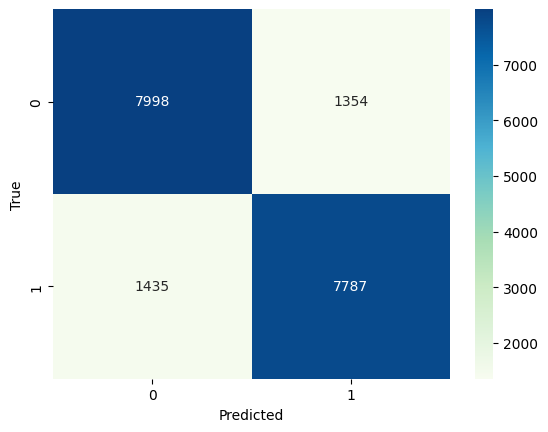

In [30]:
tabla=confusion_matrix(y_test, y_predict)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [31]:
accuracy=accuracy_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
precision=precision_score(y_test,y_predict)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8498438677721546
Recall: 0.8443938408154413
Precision: 0.8518761623454765
f1 score: 0.8481184991559112


In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      9352
           1       0.85      0.84      0.85      9222

    accuracy                           0.85     18574
   macro avg       0.85      0.85      0.85     18574
weighted avg       0.85      0.85      0.85     18574



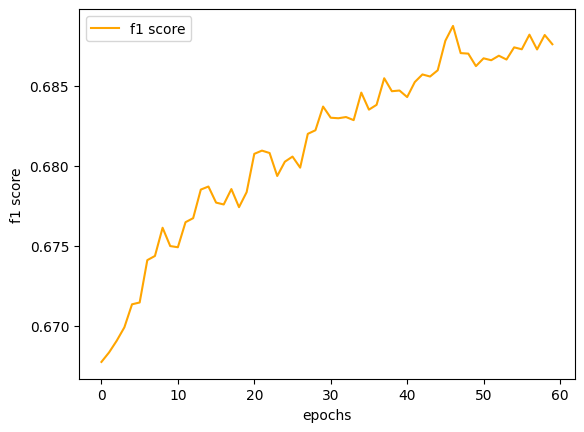

In [33]:
epochs = range(epocas)

plt.plot(epochs, history.history['f1_score'], color='orange', label='f1 score')
plt.xlabel("epochs")
plt.ylabel("f1 score")
plt.legend()

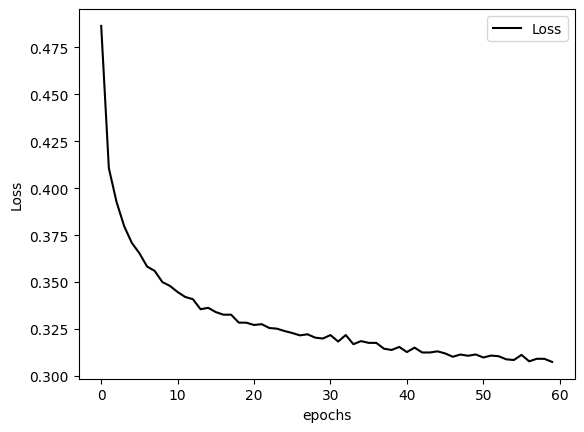

In [34]:
plt.plot(epochs, history.history['loss'], color='black', label='Loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()

# Test prediction

## Modificando el Dataset de Testeo

In [35]:
df_test = pd.read_csv("hotels_test.csv")
df_test_filtrado = df_test.copy()

In [36]:
df_test_filtrado['reservation_status_date']

0        2016-04-04
1        2016-01-22
2        2016-08-24
3        2016-11-05
4        2016-10-18
            ...    
26530    2017-04-26
26531    2016-09-06
26532    2016-08-04
26533    2017-03-07
26534    2016-03-27
Name: reservation_status_date, Length: 26535, dtype: object

In [37]:
df_test_ids = df_test['id']
df_test_filtrado = df_test_filtrado.drop('id', axis=1)
df_test_filtrado = df_test_filtrado.drop('reservation_status_date', axis=1)

In [38]:
df_test_filtrado['country'] = df_test_filtrado['country'].replace(np.nan, 'PRT')
df_test_filtrado.agent = df_test_filtrado.agent.replace(np.nan, -1)
df_test_filtrado.company = df_test_filtrado.company.replace(np.nan, -1)
df_filtrado.children = df_filtrado.children.replace(np.nan, 0)

In [39]:
df_test_filtrado.isna().any()

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False


In [40]:
lista_paises_unicos_test = df_test_filtrado['country'].unique()
lista_paises_unicos = df_filtrado['country'].unique()
conjunto1 = set(lista_paises_unicos)
conjunto2 = set(lista_paises_unicos_test)


# Obtener los elementos que están en conjunto1 pero no en conjunto2
elementos_en_lista1_no_en_lista2 = list(conjunto2 - conjunto1)
print(elementos_en_lista1_no_en_lista2)

df_test_filtrado["country"] = df_test_filtrado["country"].replace(to_replace=elementos_en_lista1_no_en_lista2, value="PRT")

['DMA', 'DJI', 'MLI', 'KHM', 'NIC', 'TMP', 'BFA', 'ASM', 'UZB', 'SLV', 'SMR', 'ATF']


In [41]:
df_test_filtrado["adr"] = df_test_filtrado["adr"].replace(to_replace=0, value=df_filtrado['adr'].median())
df_test_filtrado["adults"] = df_test_filtrado["adults"].replace(to_replace=0, value=2)

In [42]:
df_test_encodeado = pd.get_dummies(df_test_filtrado, columns=["hotel", "arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type", "customer_type"], drop_first=True)

## Prediccion

In [43]:
lista = df_test_encodeado.columns
columnas_faltantes = []
for colum in ds_encodeado.columns:
  if(colum not in lista and colum != "is_canceled"):
    print(colum)
    columnas_faltantes.append(colum)

for colum_faltante in columnas_faltantes:
  df_test_encodeado[colum_faltante] = 0

country_ARM
country_AZE
country_BEN
country_CIV
country_COM
country_ETH
country_FJI
country_FRO
country_GTM
country_HND
country_KEN
country_KNA
country_MDG
country_MNE
country_MUS
country_MYT
country_NAM
country_PAN
country_PYF
country_SDN
country_SYC
country_SYR
country_TGO
country_UMI
country_VGB
country_ZMB
market_segment_Undefined
distribution_channel_Undefined
assigned_room_type_L


In [44]:
df_test_encodeado.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,country_SDN,country_SYC,country_SYR,country_TGO,country_UMI,country_VGB,country_ZMB,market_segment_Undefined,distribution_channel_Undefined,assigned_room_type_L
0,277,2016,46,7,1,2,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,286,2016,20,11,0,4,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2016,35,23,0,1,3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,196,2016,44,29,2,5,2,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,232,2016,48,26,2,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x_test_scaled_2 = scaler.transform(df_test_encodeado.sort_index(axis=1))

In [46]:
x_test_scaled_2 = pd.DataFrame(x_test_scaled_2)

In [47]:
test_pred_2 = model.predict(x_test_scaled_2.sort_index(axis=1))
#Valores Predichos
test_pred_2

830/830 [==============================] - 1s 2ms/step


array([[1.0000000e+00],
       [9.3762004e-01],
       [1.4283897e-01],
       ...,
       [9.6038377e-01],
       [8.9676285e-01],
       [3.3705560e-06]], dtype=float32)

In [48]:
test_pred_2

array([[1.0000000e+00],
       [9.3762004e-01],
       [1.4283897e-01],
       ...,
       [9.6038377e-01],
       [8.9676285e-01],
       [3.3705560e-06]], dtype=float32)

In [49]:
y_predict_2= np.where(test_pred_2>best_umbral,1,0)
y_predict_2 = [numero for sublista in y_predict_2 for numero in sublista]

In [50]:
# Crear un DataFrame con las columnas "id" e "is_canceled"
data = {'id': df_test_ids, 'is_canceled': y_predict_2}
df_final_finalisimo = pd.DataFrame(data)

In [51]:
df_final_finalisimo.isna().any()

id             False
is_canceled    False
dtype: bool

In [52]:
df_final_finalisimo.head(10)

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
5,c142b61c-3035-46e7-8cf7-3720a29d0d61,1
6,8c4171ad-9837-4468-ac8e-8cb3d5a41b55,1
7,3ce60033-4529-4314-be77-db4a7737f326,0
8,7ab807a4-5e90-4205-b66e-0188696cc34b,0
9,a0ab0509-c8b0-4a2c-9f27-21f26e186520,0


In [53]:
df_final_finalisimo.to_csv('submission.csv', index=False)